In [1]:
#Load modules

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

from numpy.random import choice 
from numpy import where, power


In [2]:
geo = 'CHI_COM'

var_dict = {'name': ['Wages', 'Output', 'Exports', 'Imports'], 
       'dataset': ['prd','prd', 'trd', 'trd'], 
       'levels': [['CI1', 'CI2', 'CI4'],['CI1', 'CI2', 'CI4'], ['HS1', 'HS2', 'HS4'], ['HS1', 'HS2', 'HS4']],
#            'agg_ref' : [CIIU, CIIU, HS, HS],
           'agg_str' : ['CIIU','CIIU', 'HS', 'HS']}

hard_drive_path = './../../../../../media/miglesia/Elements/Matias_Iglesias_Backup/miglesia/Documents/compute-corr-structures/'
path = 'data/disagg_struct_refs/formatted/'


# GEO_chi = pd.read_csv('data/disagg_struct_refs/formatted/GEO_chi.csv')

def add_theme_attribute_column(nodes):

    node_attribute_datasets = []

    for ds in datasets:
        df = nodes[[col for col in nodes.columns if ds['ID'][:-3] in col]]

        if len(set(df.columns)) > 1: #two variables in this dataset are on diff levels

            df_x = df.merge(ds['ref'].drop_duplicates(subset = df.columns[0]), 
                            on  = df.columns[0], how = 'left', suffixes=('_x', ''))
            df_x['att_B_x'] = df_x[ds['ID']].map(ds['dict'])

            df_y = df.merge(ds['ref'].drop_duplicates(subset = df.columns[1]), 
                            on  = df.columns[1], how = 'left', suffixes=('_x', ''))
            df_y['att_B_y'] = df_y[ds['ID']].map(ds['dict'])

            # Column with values of thematic labels, from entries of 'HS' ('CIIU') dataset
#             df_ds = df_x[['att_B_x']].fillna(df_y[['att_B_y']])
            df_ds = pd.DataFrame(where(df_x.att_B_x.isnull(), df_y.att_B_y, df_x.att_B_x), columns = ['att_B'])

        else:
            df_ = df.merge(ds['ref'].drop_duplicates(subset = df.columns[0])
                           , how = 'left')
            df_ds = pd.DataFrame(df_[ds['ID']].map(ds['dict']))

        df_ds.columns = ['att_B']

        node_attribute_datasets += [df_ds]
#         print len(df_ds)

    att_B = node_attribute_datasets[0].fillna(node_attribute_datasets[1])

    nodes['att_B'] = att_B.fillna('Others')
    
    return nodes

CIIU = pd.read_csv(path+'CIIU_full.csv')
HS = pd.read_csv(path+'hs_full.csv').astype(str)
HS[[col for col in HS.columns if 'HS ID' in col]] = HS[[col for col in HS.columns if 'HS ID' in col]].astype('int')

HS_cats_dict = {1: 'Vegetables, animals, wood', 2: 'Vegetables, animals, wood', 3: 'Vegetables, animals, wood', 
     4: 'Vegetables, animals, wood', 9: 'Vegetables, animals, wood', 10: 'Vegetables, animals, wood', 
     5: 'Minerals, metals', 14: 'Minerals, metals', 15: 'Minerals, metals',  
     11: 'Textiles', 12: 'Textiles',
     16: 'Manufacture, machinery', 17: 'Manufacture, machinery', 18: 'Manufacture, machinery', 19: 'Manufacture, machinery', 20: 'Manufacture, machinery'}
CIIU_cats_dict = {'A': 'Vegetables, animals, wood', 'B': 'Minerals, metals', 'C': 'Fabrication', 'G': 'Commerce', 'O': 'Public sector'}


datasets = [{'ref': HS,'ID':'HS ID HS1', 'dict': HS_cats_dict},
               {'ref': CIIU, 'ID':'CIIU ID CI1', 'dict': CIIU_cats_dict }]


In [12]:
# edges_max_d = df1.merge(df2, on = ['index_x', 'index_y', 'weight_'+geo]).reset_index(drop = True)
# df2
df1.merge(df2, on = ['index_x', 'label_x', 'index_y', 'label_y', 'weight_'+geo])

index_x                                            label_x  index_y  \
0            1       Exports of '02 - Meat and edible meat offal'     1599   
1            1       Exports of '02 - Meat and edible meat offal'      186   
2            1       Exports of '02 - Meat and edible meat offal'     1719   
3            1       Exports of '02 - Meat and edible meat offal'       16   
4            1       Exports of '02 - Meat and edible meat offal'      458   
5            1       Exports of '02 - Meat and edible meat offal'     1517   
6            1       Exports of '02 - Meat and edible meat offal'     1661   
7            1       Exports of '02 - Meat and edible meat offal'      226   
8            1       Exports of '02 - Meat and edible meat offal'      436   
9            1       Exports of '02 - Meat and edible meat offal'      428   
10           1       Exports of '02 - Meat and edible meat offal'      158   
11           1       Exports of '02 - Meat and edible meat offal'     1363   
12           1       Exports of '02 - Meat and edible meat offal'      285   
13           1       Exports of '02 - Meat and edible meat offal'     1053   
14           2  Exports of '03 - Fish and crustaceans, mollusc...     1201   
15           2  Exports of '03 - Fish and crustaceans, mollusc...     1839   
16           2  Exports of '03 - Fish and crustaceans, mollusc...      137   
17           2  Exports of '03 - Fish and crustaceans, mollusc...     1423   
18           2  Exports of '03 - Fish and crustaceans, mollusc...       26   
19           2  Exports of '03 - Fish and crustaceans, mollusc...     1875   
20           2  Exports of '03 - Fish and crustaceans, mollusc...       22   
21           2  Exports of '03 - Fish and crustaceans, mollusc...      384   
22           2  Exports of '03 - Fish and crustaceans, mollusc...     1448   
23           2  Exports of '03 - Fish and crustaceans, mollusc...     1577   
24           2  Exports of '03 - Fish and crustaceans, mollusc...     1372   
25           2  Exports of '03 - Fish and crustaceans, mollusc...     1465   
26           2  Exports of '03 - Fish and crustaceans, mollusc...     1593   
27           2  Exports of '03 - Fish and crustaceans, mollusc...     1855   
28           2  Exports of '03 - Fish and crustaceans, mollusc...       40   
29           2  Exports of '03 - Fish and crustaceans, mollusc...     1549   
...        ...                                                ...      ...   
11013     1903  Wages of 'Tratamiento y disposición de desecho...      358   
11014     1903  Wages of 'Tratamiento y disposición de desecho...      523   
11015     1903  Wages of 'Tratamiento y disposición de desecho...     1342   
11016     1903  Wages of 'Tratamiento y disposición de desecho...      465   
11017     1903  Wages of 'Tratamiento y disposición de desecho...      538   
11018     1903  Wages of 'Tratamiento y disposición de desecho...      546   
11019     1903  Wages of 'Tratamiento y disposición de desecho...     1380   
11020     1903  Wages of 'Tratamiento y disposición de desecho...      104   
11021     1903  Wages of 'Tratamiento y disposición de desecho...     1494   
11022     1904  Wages of 'Tratamiento y revestimiento de metal...      523   
11023     1904  Wages of 'Tratamiento y revestimiento de metal...      158   
11024     1904  Wages of 'Tratamiento y revestimiento de metal...       35   
11025     1904  Wages of 'Tratamiento y revestimiento de metal...     1851   
11026     1904  Wages of 'Tratamiento y revestimiento de metal...     1484   
11027     1904  Wages of 'Tratamiento y revestimiento de metal...     1532   
11028     1904  Wages of 'Tratamiento y revestimiento de metal...     1494   
11029     1904  Wages of 'Tratamiento y revestimiento de metal...      928   
11030     1904  Wages of 'Tratamiento y revestimiento de metal...     1495   
11031     1904  Wages of 'Tratamiento y revestimiento de metal...       71   
11032     1904  Wages of 'Tra

In [13]:
import networkx as nx

max_d = 10
k = 0.05
max_degrees = [4, 7, 10, 20, 40]
k = [.02, .05, 0.09, .11, .15]
k = [.02, .05, 0.06, .10, .16]
l = len(max_degrees)


# files = glob.glob('./Figures/6_neighbhoods/*')
path = 'data/new/'

conf = ('CI4', 'CI4', 'HS4', 'HS2')

#     (CIIU_lev, HS_Exp, HS_Imp) = conf
#     (CBO_lev, CNAE_lev, HS_Exp, HS_Imp) = conf

#     col_name = ctry_str+'_'+geo_str+'_'+'_'.join([c for c in conf])+var_str
conf_name = geo+'_'+'_'.join([var_dict['name'][m][0]+conf[m][2::2] for m in range(len(var_dict['name']))])

#             print conf_name

# nodes = pd.read_csv(hard_drive_path+path+conf_name+'_nodes.csv', index_col = 0).sort_index().reset_index()
nodes = pd.read_csv('./../../../../../media/miglesia/Elements/corr_st_data/nodes_bs.csv').sort_index().reset_index().rename({'Unnamed: 0': 'node_name'}, axis = 1)

nodes = nodes.sort_index()

rainbow_colors = {1:'#9400D3', #Violet
2:'#4B0082', #Indigo
3:'#0000FF', #Blue
4:'#00FF00', #Green
5:'#D3D3D3', #Gray
6:'#FFFF00', #Yellow
7:'#FF7F00', #Orange
8:'#FF0000'} #Red


# edges = pd.read_csv(hard_drive_path+path+conf_name+'_edges.csv', index_col = 0)[['label_x', 'label_y', 'weight_CHI_COM']]
edges = pd.read_csv('./../../../../../media/miglesia/Elements/corr_st_data/CHI_COM_W4_O4_E2_I4_edges_bs.csv', index_col = 0)[['label_x', 'label_y', 'weight_CHI_COM']]
edges = edges.merge(nodes['node_name'].reset_index(), left_on='label_x', right_on='node_name').merge(
    nodes['node_name'].reset_index(), left_on='label_y', right_on='node_name')[['index_x', 'label_x', 'index_y', 'label_y', 'weight_CHI_COM']]



    #     Add info of districts with most volume (CHI)
###
# From concat data get node value totals

df = pd.read_csv(hard_drive_path+path+conf_name+'_cc_data.csv', index_col = 'node_name')
df['node_value_USD'] = df.groupby('node_name')[['value_USD']].sum()

df = df.reset_index()

#     ###

#color
from matplotlib import colors

nodes = add_theme_attribute_column(nodes) #add gross thematic attributes, function is written below

nodes['color_code'] = nodes.att_B.rank(method = 'dense') #or att_B

nodes['color'] = pd.DataFrame(nodes['color_code'].map(rainbow_colors))

value = nodes['node_value_USD']
# nodes['node_size'] = np.sqrt((value/value.median()).values)
nodes['node_size'] = power((value/value.median()).values, 1/2.)
nodes['node_size'] = 30*nodes['node_size']/nodes['node_size'].median()

#     nodes = nodes.merge(code_hex)
max_d = 20

        ### Max degree = max_d. Parameter used to trim the network.
df1 = edges.groupby('index_x').apply(lambda x: x.nlargest(max_d, 'weight_'+geo)).reset_index(drop = True)
df2 = edges.groupby('index_y').apply(lambda x: x.nlargest(max_d, 'weight_'+geo)).reset_index(drop = True)
edges_max_d = df1.merge(df2, on = ['index_x', 'label_x', 'index_y', 'label_y', 'weight_'+geo]).reset_index(drop = True)

###

G = nx.from_pandas_dataframe(edges_max_d, 'index_x', 'index_y', 'weight_'+geo)

# Subset of nodes
nodes_s = nodes.loc[G.nodes()]



#Perform Graph Drawing
# for k in [.3, .2, .1, .05]:

#     pos = nx.spring_layout(G, k=k)

#     plt.figure(figsize = (10, 8))

#     nx.draw(G, pos, node_size = nodes_s.node_size.values, alpha=.6, node_color= list(nodes_s.color.values), edgelist = [])
#     nx.draw_networkx_edges(G, pos, edge_color='.7', alpha=.3)
#     plt.title('max_d = '+str(max_d))
#     plt.title(conf_name+'\n max_degree = '+str(max_d))
#     #     plt.savefig('./Figures/5_max_deg/'+col_name+'_plot1.png')
#     #             plt.show()

#     plt.show()




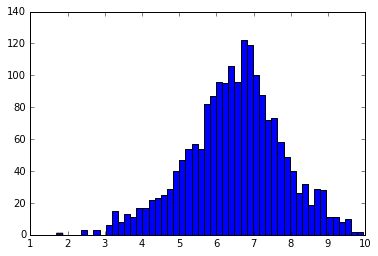

In [109]:
from numpy import log10
plt.hist(log10(nodes['node_value_USD']).values, 50)
plt.show()

In [5]:
print nodes.groupby('Variable')['node_value_USD'].sum()

Variable
Exports    1.486418e+10
Imports    1.247512e+10
Output     1.389312e+11
Wages      1.916412e+10
Name: node_value_USD, dtype: float64


In [8]:
print nodes.groupby('Variable')['node_value_USD'].sum()

Variable
Exports    7.489471e+10
Imports    6.605533e+10
Output     5.518649e+11
Wages      7.644364e+10
Name: node_value_USD, dtype: float64


In [34]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

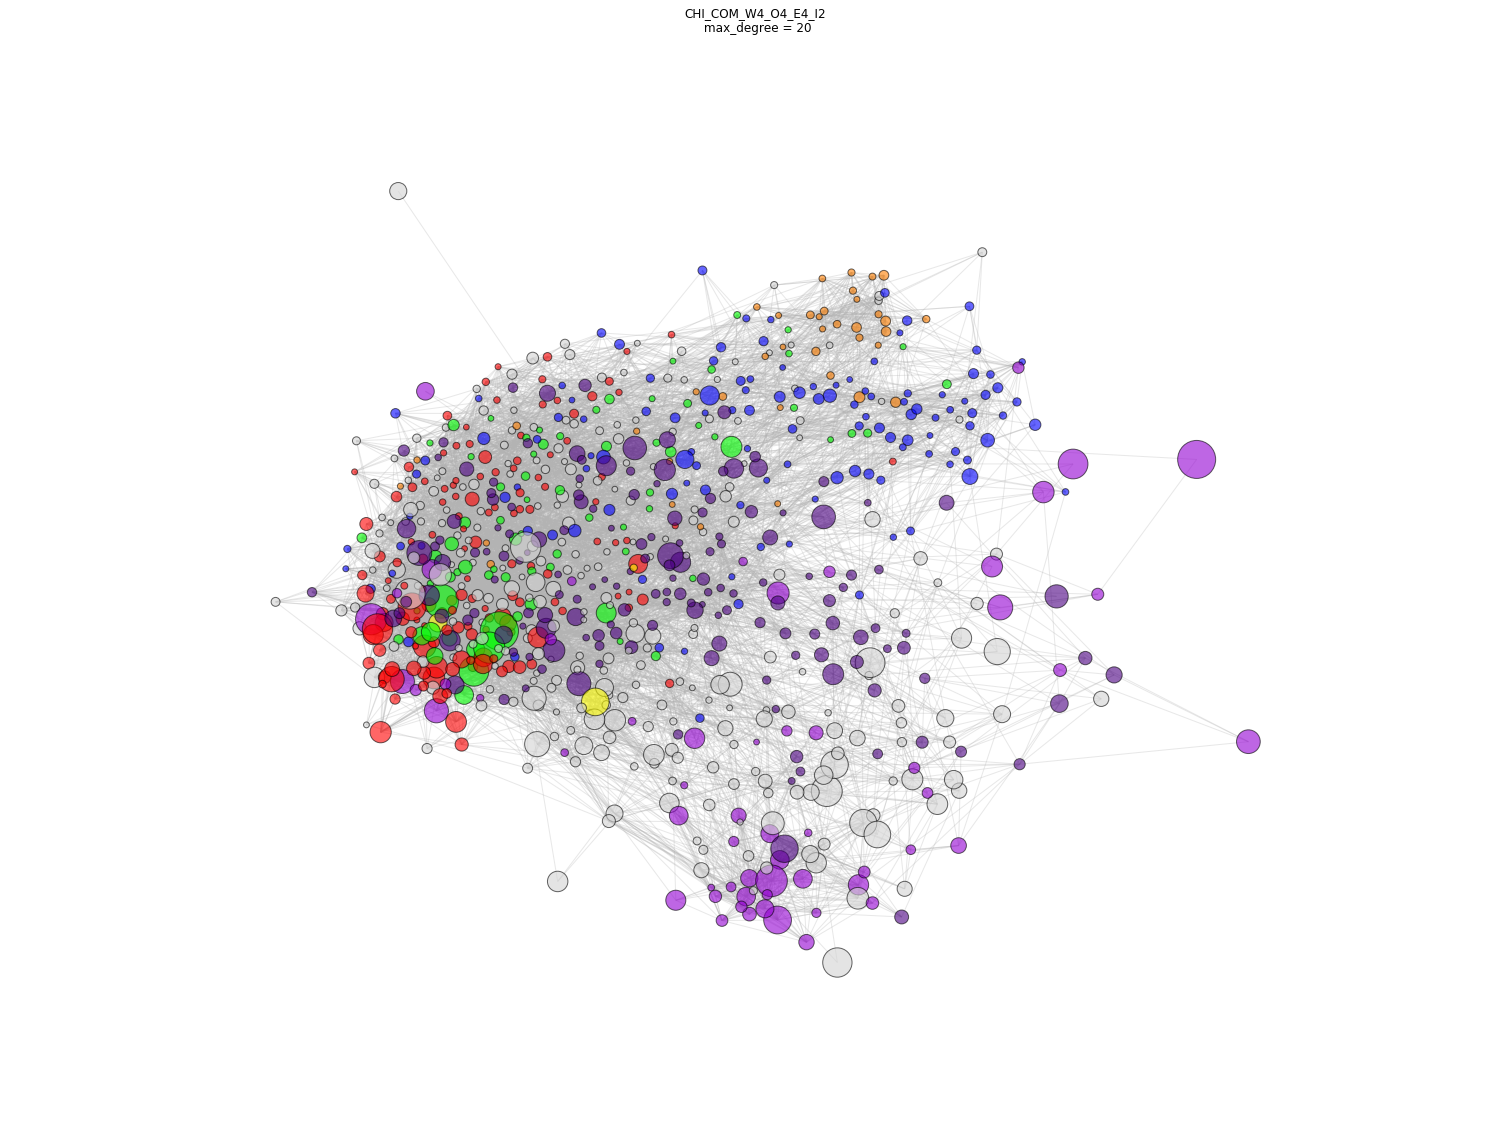

In [14]:
# Hard threshold and max degree backboning

plt.figure(figsize = (20, 15))


pos = nx.spring_layout(G, k=.1)

nx.draw(G, pos, node_size = nodes_s.node_size.values, alpha=.6, node_color= list(nodes_s.color.values), edgelist = [])
nx.draw_networkx_edges(G, pos, edge_color='.7', alpha=.3)
plt.title('max_d = '+str(max_d))
plt.title(conf_name+'\n max_degree = '+str(max_d))
#     plt.savefig('./Figures/5_max_deg/'+col_name+'_plot1.png')
#             plt.show()

plt.show()




## Michelle's backboning

In [114]:
import sys
sys.path.append("./../visualization-notebook-templates/") # for HH tools

import backboning as bb


edges_bb = edges[['index_x', 'index_y', 'weight_CHI_COM']].rename({'index_x': 'src', 'index_y': 'trg'}, axis = 1)#.to_csv('edges_bb_test.csv', index = False)
edges_bb.to_csv('edges_bb_test.csv', index = False)

In [116]:
for threshold in [6.81,]:
# for threshold in [5.81,]:
    table, nnodes, nnedges = bb.read('edges_bb_test.csv', "weight_CHI_COM", sep = ',')
    nc_table = bb.noise_corrected(table)
    nc_backbone = bb.thresholding(nc_table, threshold)
    print len(nc_backbone)
    print nnodes
# backboning.write(nc_backbone, "network_name", "nc", "/path/to/output")

Index([u'src', u'trg', u'weight_CHI_COM'], dtype='object')
Index([u'src', u'trg', u'nij'], dtype='object')
14104
871


Calculating NC score...


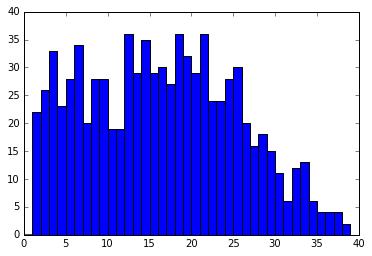

In [118]:
plt.hist(nc_backbone.groupby('src').count()['score'].sort_values(), range(40))
plt.show()

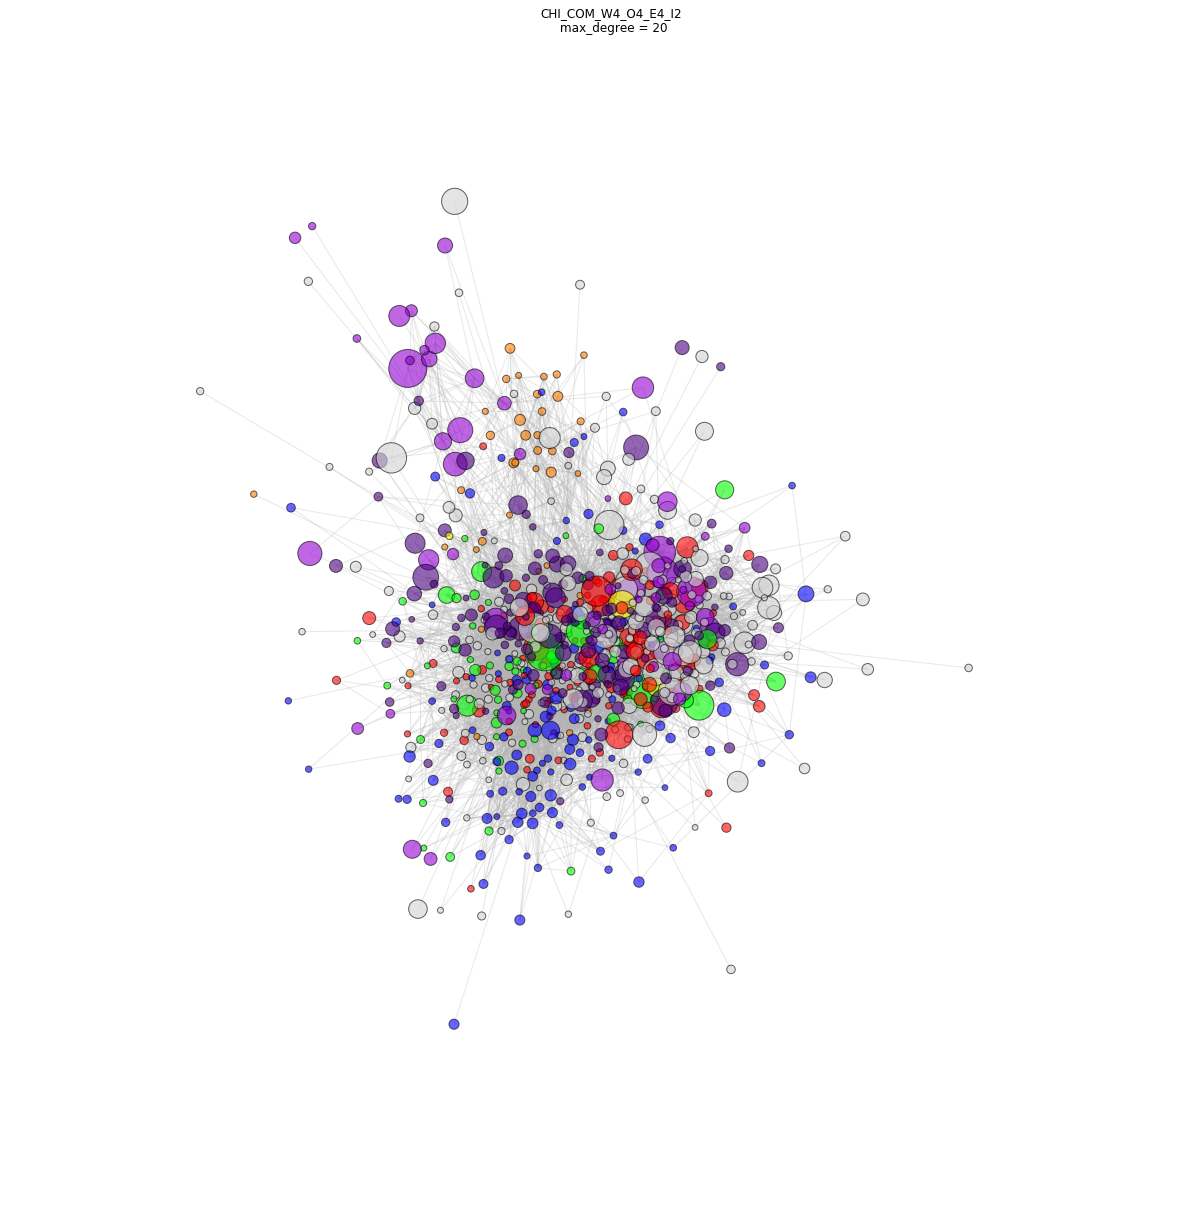

In [120]:

G = nx.from_pandas_dataframe(nc_backbone, 'src', 'trg', 'score')
G = max(nx.connected_component_subgraphs(G), key=len)

plt.figure(figsize = (16, 16))

pos = nx.spring_layout(G, k=.05)

nx.draw(G, pos, node_size = nodes_s.node_size.values, alpha=.6, node_color= list(nodes_s.color.values), edgelist = [])
nx.draw_networkx_edges(G, pos, edge_color='.7', alpha=.3)
plt.title('max_d = '+str(max_d))
plt.title(conf_name+'\n max_degree = '+str(max_d))
#     plt.savefig('./Figures/5_max_deg/'+col_name+'_plot1.png')
#             plt.show()

plt.show()

### Draw in d3plus

In [16]:
# nodes
pos_df = pd.DataFrame(pos, index = ['x', 'y']).T
nodes = pd.concat([nodes, pos_df], axis = 1)

In [17]:
nodes_ = nodes.reset_index()[['index','x', 'y', 'node_name', 'color']].dropna(subset = ['x']).rename({'index': 'id'}, axis = 1)
nodes_['id'] = nodes_['id'].astype(str).str.zfill(4)
nodes_[['x', 'y']] = 2000 * nodes_[['x', 'y']]


In [11]:
import sys
sys.path.append("./../visualization-notebook-templates/modules/") # for d3plus2
sys.path.append("./../visualization-notebook-templates/") # for HH tools
import d3plus2 as d3plus
import pandas as pd
from HH_tools import robust_proximity, year_to_tp

ImportError: No module named d3plus2

In [18]:
nodes_['presence'] = True

links = edges_max_d.reset_index().rename({'weight_CHI_COM': 'strength'},axis = 1)
links['target'] = links['index_y'].astype(str).str.zfill(4)
links['source'] = links['index_x'].astype(str).str.zfill(4)

# links = nc_backbone.reset_index().rename({'score': 'strength'},axis = 1)
# links['target'] = links['trg'].astype(str).str.zfill(4)
# links['source'] = links['src'].astype(str).str.zfill(4)


network = '{"nodes": '+nodes_.to_json(orient= 'records')+', "edges": '+links[['index', 'source', 'target']].to_json(orient= 'records')+'}\n'
# network

In [134]:
ps = d3plus.ProductSpace(
id="name",
name="node_name",
color="color",
graph_data=network,
presence="presence",
edge_property="edges",
network_id="id")
ps.draw(nodes_)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [60]:
nodes.dropna(subset = ['x'])

node_name  CIIU ID CI4  \
8     Exports of '0203 - Meat of swine; fresh, chill...          NaN   
11    Exports of '0207 - Meat and edible offal of po...          NaN   
16    Exports of '0302 - Fish; fresh or chilled, exc...          NaN   
17    Exports of '0303 - Fish; frozen, excluding fis...          NaN   
18    Exports of '0304 - Fish fillets and other fish...          NaN   
19    Exports of '0305 - Fish, dried, salted or in b...          NaN   
20    Exports of '0306 - Crustaceans; in shell or no...          NaN   
21    Exports of '0307 - Molluscs; whether in shell ...          NaN   
24    Exports of '0402 - Milk and cream; concentrate...          NaN   
55    Exports of '0710 - Vegetables (uncooked or coo...          NaN   
61    Exports of '0802 - Nuts (excluding coconuts, B...          NaN   
63    Exports of '0804 - Dates, figs, pineapples, av...          NaN   
64     Exports of '0805 - Citrus fruit; fresh or dried'          NaN   
65           Exports of '0806 - Grapes; fresh or dried'          NaN   
67    Exports of '0808 - Apples, pears and quinces; ...          NaN   
68    Exports of '0809 - Apricots, cherries, peaches...          NaN   
69    Exports of '0810 - Fruit, fresh; n.e.c. in cha...          NaN   
70    Exports of '0811 - Fruit and nuts; uncooked or...          NaN   
72    Exports of '0813 - Fruit, dried, other than th...          NaN   
88                     Exports of '1005 - Maize (corn)'          NaN   
109   Exports of '1209 - Seeds, fruit and spores; of...          NaN   
112   Exports of '1212 - Locust beans, seaweeds and ...          NaN   
116   Exports of '1302 - Vegetable saps and extracts...          NaN   
122   Exports of '1504 - Fats and oils and their fra...          NaN   
143   Exports of '1604 - Prepared or preserved fish;...          NaN   
144   Exports of '1605 - Crustaceans, molluscs and o...          NaN   
155   Exports of '1901 - Malt extract; flour/groats/...          NaN   
158   Exports of '1904 - Prepared foods obtained by ...          NaN   
161   Exports of '2002 - Tomatoes; prepared or prese...          NaN   
166   Exports of '2007 - Jams, fruit jellies, marmal...          NaN   
...                                                 ...          ...   
1855  Wages of 'Otras actividades complementarias al...       5229.0   
1856  Wages of 'Otras actividades de atencion en ins...       8790.0   
1859  Wages of 'Otras actividades de servicio financ...       6499.0   
1860  Wages of 'Otras actividades de servicios perso...       9609.0   
1861  Wages of 'Otras actividades de telecomunicacio...       6190.0   
1864  Wages of 'Otras actividades profesionales, cie...       7490.0   
1865  Wages of 'Otras actividades recreativas y de e...       9329.0   
1866  Wages of 'Otras industrias manufactureras n.c.p.'       3290.0   
1867      Wages of 'Otras instalaciones especializadas'       4329.0   
1869      Wages of 'Otros cultivos transitorios n.c.p.'        119.0   
1871  Wages of 'Otros tipos de comercio al por menor...       4799.0   
1872               Wages of 'Otros trabajos de edicion'       5819.0   
1875                         Wages of 'Pesca maritima '        311.0   
1877                 Wages of 'Preparacion del terreno'       4312.0   
1879  Wages of 'Procesamiento y conservacion de frut...       1020.0   
1881  Wages of 'Produccion de gas; distribucion de c...       3520.0   
1882  Wages of 'Produccion de malta, elaboracion de ...       1103.0   
1883  Wages of 'Propagacion de plantas (actividades ...        130.0   
1884                              Wages of 'Publicidad'       7310.0   
1889                         Wages of 'Seguros de vida'       6512.0   
1890                      Wages of 'Seguros generales '       6511.0   
1891   Wages of 'Servicios de apoyo a la silvicultura '        240.0   
1892  Wages of 'Silvicultura y otras actividades for...        210.0   
1894       Wages of 'Transporte de carga por carretera'       4923.0   
1895  Wages of

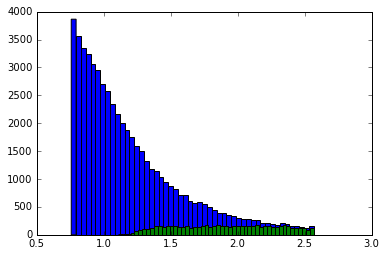

In [53]:
plt.hist(edges.weight_CHI_COM.values, 50)
plt.hist(edges_max_d.weight_CHI_COM.values, 50)
plt.show()